In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tables/B.6.csv
/kaggle/input/tables/B.4.csv
/kaggle/input/tables/B.3.csv
/kaggle/input/tables/B1.csv
/kaggle/input/project/train_final.csv


In [4]:
train_final = pd.read_csv('/kaggle/input/project/train_final.csv')

In [5]:
y_train=train_final['target']
x_train=train_final.drop(['target','customer_ID'],axis=1)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  
from sklearn.metrics import precision_score                         
from sklearn.metrics import recall_score
x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(x_train, y_train, test_size=0.25, random_state=26)

In [7]:
# Use Random Forest
from sklearn.ensemble import RandomForestClassifier

In [8]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [9]:
model = RandomForestClassifier(n_estimators=400, max_features='sqrt', bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=5, n_jobs=-1)
#rf_random = GridSearchCV(estimator = rf, param_grid = random_grid, cv = 3, verbose=1, n_jobs = -1)
# Fit the random search model


In [10]:
import time

st=time.time()

model.fit(x_train_split,y_train_split)

et=time.time()

In [11]:
print(et-st)

744.7563443183899


## Time taken to fit the model = 744.7563443183899 seconds

## Used Grid Search to get hyperparameter for Random Forest model
## n_estimators = 400 
## max_features = 'sqrt'
## max_depth = 30
## min_samples_split = 

In [12]:
model.score(x_test_split, y_test_split)

0.8826887709297562

# Accuracy = 88.33%

In [13]:
st_p=time.time()
y_pred = model.predict(x_test_split)
et_p=time.time()

In [14]:
print(et_p-st_p)

5.257267713546753


# Time taken to predict to predict 91783 test rows =  5.257267713546753 seconds
## Either write this in report for single prediction or bunch.

In [15]:
print(y_pred)

[1 0 0 ... 0 0 0]


# Classification Report

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test_split, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92     85157
           1       0.78      0.75      0.77     29572

    accuracy                           0.88    114729
   macro avg       0.85      0.84      0.84    114729
weighted avg       0.88      0.88      0.88    114729



# Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_split, y_pred)
cm

array([[79009,  6148],
       [ 7311, 22261]])

Text(95.72222222222221, 0.5, 'Truth')

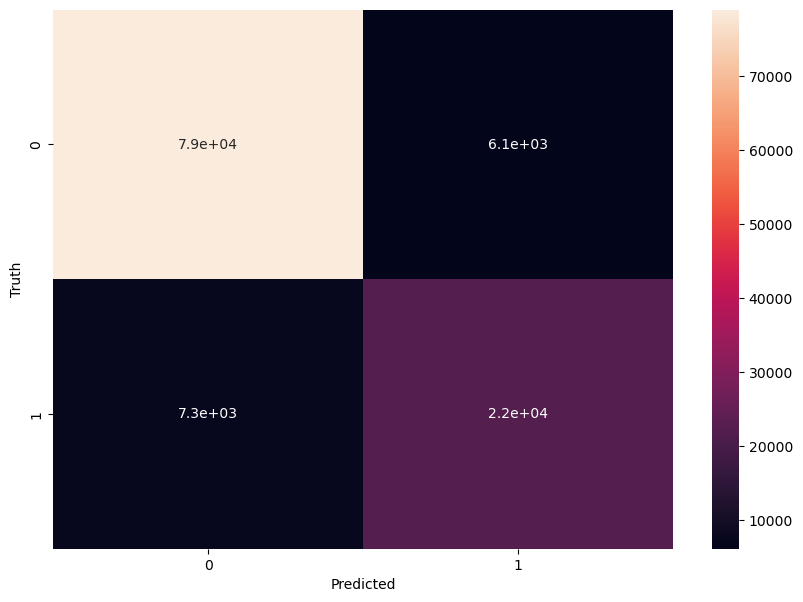

In [18]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')